# Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("hotel.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Data Overview

In [3]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# Numerical Columns

In [5]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']

print("Number of Numeric Variables ",len(numerical_features))
data[numerical_features].head(5)

Number of Numeric Variables  14


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


# Discrete Columns

In [6]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 ]

print("Total Discrete Variables {}".format(len(discrete_feature)))

Total Discrete Variables 10


# Continuous Columns

In [7]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Total Continuous Variables {}".format(len(continuous_feature)))

Total Continuous Variables 4


# Categorical Columns

In [8]:
numerical_features=[feature for feature in data.columns if data[feature].dtype=='object']

print("Number of Numeric Variables ",len(numerical_features))


Number of Numeric Variables  5


In [9]:
data.replace(to_replace = "Not_Canceled", value =0,inplace=True)
data.replace(to_replace = "Canceled", value =1,inplace=True)

# Exploratory Data Analysis (EDA)# 

In [10]:
data["arrival_month"].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

# Bussiest months in the hotel

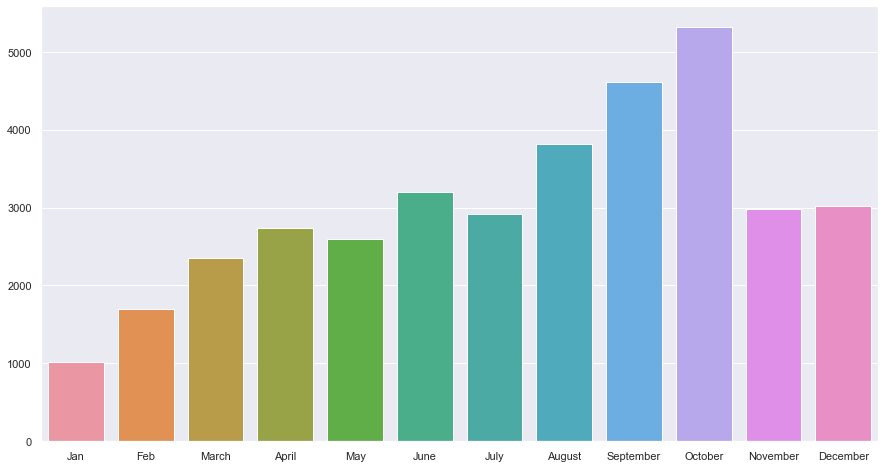

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Jan', 'Feb','March','April','May','June','July','August','September','October','November','December']
y = [1014, 1704, 2358,2736,2598,3203,2920,3813,4611,5317,2980,3021]

sns.set(rc = {'figure.figsize':(15,8)})

#plt.xticks(rotation=45, fontsize=15)

sns.barplot(x, y)
plt.show()

August, September and October are the Bussiest Months  as we can clearly see it from the Bar Chart

# Market Segment Type

In [12]:
data["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

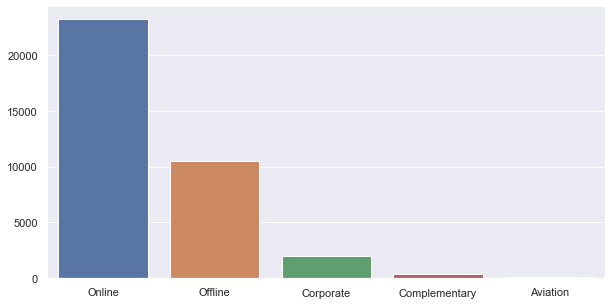

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Online', 'Offline','Corporate','Complementary','Aviation']
y = [23214,10528,2017,391,125]

sns.set(rc = {'figure.figsize':(10,5)})

#plt.xticks(rotation=45, fontsize=15)

sns.barplot(x, y)
plt.show()

Most of the guests are from Online Segemnt Type and the least Guests are from Aviation Segment Type

# Comparison of Cancelled Vs Non Cancelled Bookings

In [14]:
data["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

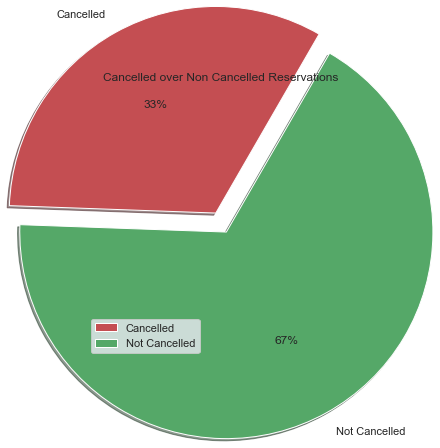

In [15]:
status = ['Cancelled', 'Not Cancelled'] 
  
# portion covered by each label 
slices = [11885, 24390] 
  
# color for each label 
colors = ['r', 'g'] 
plt.title("Cancelled over Non Cancelled Reservations")
  
# plotting the pie chart 
plt.pie(slices, labels = status, colors=colors,  
        startangle=60, shadow = True, explode = (0.1, 0.1, ), 
        radius = 1.9, autopct = '%1.0f%%') 

  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show()

# Comparison of Repeated Guests Cancelled VS Non Cancelled Bookings

In [16]:
data.loc[data["repeated_guest"]==1,"booking_status"].value_counts()

0    914
1     16
Name: booking_status, dtype: int64

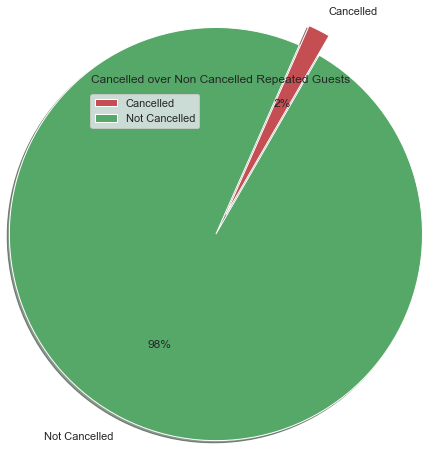

In [17]:
status = ['Cancelled', 'Not Cancelled'] 
  
# portion covered by each label 
slices = [16, 914] 
  
# color for each label 
colors = ['r', 'g'] 
plt.title("Cancelled over Non Cancelled Repeated Guests")
  
# plotting the pie chart 
plt.pie(slices, labels = status, colors=colors,  
        startangle=60, shadow = True, explode = (0.1, 0.1, ), 
        radius = 1.9, autopct = '%1.0f%%') 

  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show()

# Effect of Special Requirements on Cancellation

In [18]:
data.loc[data["no_of_special_requests"]==0,"booking_status"].value_counts()

0    11232
1     8545
Name: booking_status, dtype: int64

In [19]:
data.loc[data["no_of_special_requests"]==1,"booking_status"].value_counts()

0    8670
1    2703
Name: booking_status, dtype: int64

In [20]:
data.loc[data["no_of_special_requests"]==2,"booking_status"].value_counts()

0    3727
1     637
Name: booking_status, dtype: int64

In [21]:
data.loc[data["no_of_special_requests"]==3,"booking_status"].value_counts()

0    675
Name: booking_status, dtype: int64

In [22]:
data.loc[data["no_of_special_requests"]==4,"booking_status"].value_counts()

0    78
Name: booking_status, dtype: int64

In [23]:
data.loc[data["no_of_special_requests"]==5,"booking_status"].value_counts()

0    8
Name: booking_status, dtype: int64

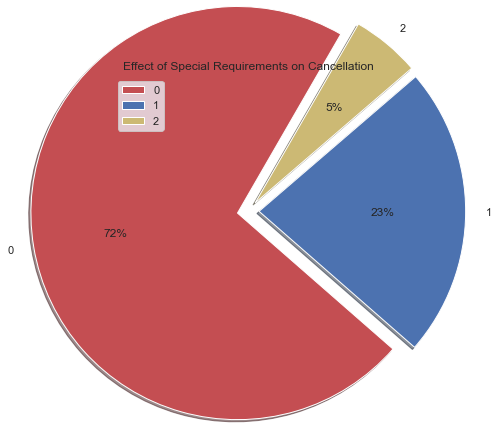

In [24]:
special_requests = [0,1,2,] 
  
# portion covered by each label 
slices = [8545,2703,637] 
  
# color for each label 
colors = ['r', 'b','y'] 
plt.title("Effect of Special Requirements on Cancellation")
  
# plotting the pie chart 
plt.pie(slices, labels = special_requests, colors=colors,  
        startangle=60, shadow = True, explode = (0.1, 0.1, 0.1), 
        radius = 1.9, autopct = '%1.0f%%') 

  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show()

We can Clearly see that the the special Requirement that the user asked for which the hotel management replaced it with 0 has high impact on the cancellation of the Reservance 

# Cancellation ratio w.r.t Years

In [25]:
data.loc[data["arrival_year"]==2017,"booking_status"].value_counts()

0    5553
1     961
Name: booking_status, dtype: int64

In [26]:
data.loc[data["arrival_year"]==2018,"booking_status"].value_counts()

0    18837
1    10924
Name: booking_status, dtype: int64

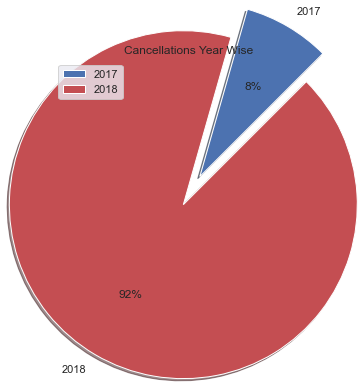

In [27]:
years = [2017,2018] 
  
# portion covered by each label 
slices = [961,10924] 
  
# color for each label 
colors = ['b', 'r'] 
plt.title("Cancellations Year Wise")
  
# plotting the pie chart 
plt.pie(slices, labels = years, colors=colors,  
        startangle=45, shadow = True, explode = (0.2, 0.1), 
        radius = 1.6, autopct = '%1.0f%%') 

  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show()

# Data   Pre-Processing

# Check For Null

In [28]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()]

for feature in features_with_na:
    
    print(feature,(data[feature].isnull().sum()))
    
    #print(feature,np.round(data[feature].isnull().mean(),4),"% missing values")

# Outliers Removing Using IQR Method

In [29]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']
dataset=data.copy()

for feature in numerical_features:
        q1=dataset[feature].quantile(0.25)
        q3=dataset[feature].quantile(0.75)
        iqr=q3-q1
        lower_lim=q1-1.5*iqr
        upper_lim=q3+1.5*iqr
        
        dataset=dataset[(dataset[feature]<=upper_lim) & (dataset[feature]>=lower_lim)]

In [30]:
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,0
12,INN00013,2,0,2,1,Not Selected,0,Room_Type 1,30,2018,11,26,Online,0,0,0,88.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


 We calculate the 25 quantile and 75th Quantile of each column and we drop all that data that is below the 25th quantile and above 75th quantile, that are actually outliers

# Categorical to Numerical Conversion using Label Encoder

In [31]:
categorical=[features for features in dataset.columns if dataset[features].dtype=="object"]
categorical

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


for features in categorical:
    #label_encoder=LabelEncoder()
    dataset[features]=label_encoder.fit_transform(dataset[features])

In [32]:
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,0,2,0,2,3,2,0,0,5,2018,11,6,4,0,0,0,106.68,1,0
3,1,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,1
4,2,2,0,1,1,2,0,0,48,2018,4,11,4,0,0,0,94.50,0,1
7,3,2,0,1,3,0,0,3,83,2018,12,26,4,0,0,0,105.61,1,0
12,4,2,0,2,1,2,0,0,30,2018,11,26,4,0,0,0,88.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,17153,2,0,1,0,2,0,0,49,2018,7,11,4,0,0,0,93.15,0,1
36271,17154,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,1
36272,17155,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,0
36273,17156,2,0,0,3,2,0,0,63,2018,4,21,4,0,0,0,94.50,0,1


All the Categorical Features are Converted into Numerical Features as because the model just understands numbers it doesnot understand String Dtype so we convert it using Label Encoder Preprocessor

# Multi Colinearity Checking

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set    
X = dataset.drop("booking_status",axis="columns")
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                 feature       VIF
0                             Booking_ID  1.005733
1                           no_of_adults  0.000000
2                         no_of_children       NaN
3                   no_of_weekend_nights  1.038566
4                      no_of_week_nights  1.082505
5                      type_of_meal_plan  1.217353
6             required_car_parking_space       NaN
7                     room_type_reserved  1.276303
8                              lead_time  1.163701
9                           arrival_year  0.000000
10                         arrival_month  1.132898
11                          arrival_date  1.005986
12                   market_segment_type  1.320262
13                        repeated_guest       NaN
14          no_of_previous_cancellations       NaN
15  no_of_previous_bookings_not_canceled       NaN
16                    avg_price_per_room  1.295246
17                no_of_special_requests  1.148044


As the VIF value of each column is below 5 so we conclude that no Multi Collinearity between the Independent Features Exist

# Splitting of Dataset into Train and Test

In [34]:
y=dataset[['booking_status']]
x=dataset.drop(['booking_status','Booking_ID'],axis='columns')

# Data Balancing

In [35]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,train_size=0.80)

# Logistic Regression

In [37]:
model=LogisticRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
model.score(x_test,y_test)

0.761598857958601

# Model Performance Evaluation

In [38]:

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2078
           1       0.77      0.74      0.76      2125

    accuracy                           0.76      4203
   macro avg       0.76      0.76      0.76      4203
weighted avg       0.76      0.76      0.76      4203



# Final Model Summary

Overall if we judge model Precision or recall or F1 score of the model  it is fine but we need more Accuarate Results in specially Classification Problems.

# Decision Tree Classifier

In [39]:

model=DecisionTreeClassifier()
model.fit(x_train, y_train)
pred=model.predict(x_test)
model.score(x_test,y_test)

0.8653342850344992

# Model Performance Comparison and Conclusions 

In [40]:

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2078
           1       0.87      0.86      0.87      2125

    accuracy                           0.87      4203
   macro avg       0.87      0.87      0.87      4203
weighted avg       0.87      0.87      0.87      4203



Logistic Regression
- Precision (78% in predicting that Reservation was not cancelled)
- Precision (77% in predicting that reservation was cancelled)

- Overall Accuracy was of this model is 78% 

Decision Tree Classifier

- Precision (88% in predicting that Reservation was not cancelled)
- Precision (70% in predicting that reservation was cancelled)
- Overall Accuracy was of this model is 84% 

So we can clearly conclude that Decision Tree Classifier is the best and more accuarte model in Predicting Reservation status

# Actionable Insights and Recommendations

August, September and October are the most important Months for the Hotel so they must have enough Energitic staff to handle the Hotel Management tasks

- In my Opinion 72 % of Clients that requested the Special Requirement 0 cancelled the Booking so we have to look into specially this thing that why the Clients who opted this facility  are Cancelling the Booking.

- October is the most important month for the Hotel So the Staff should be enough must to handle such huge client requests in this month
- In 2017 the cancellation ratio with respect to 2018 was just 8 percent.

- In 2018 the cancellation ratio was raised to 92% with respect to 2017 

So a thorough staff evaluation and services and advertisement evaluation should be done to iprove the Hotel Lost
